In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
delay_url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
delay_table = pd.read_csv(delay_url, sep=',')

In [3]:
delay_table = delay_table.dropna()

In [4]:
df0 = delay_table.where(delay_table['dep_delay'] > 0) #таблица задержек
df60 = delay_table.where(delay_table['dep_delay'] > 60) #таблица задержек длительностью более часа

1. Рассмотрим среднюю задержку рейсов по месяцам.

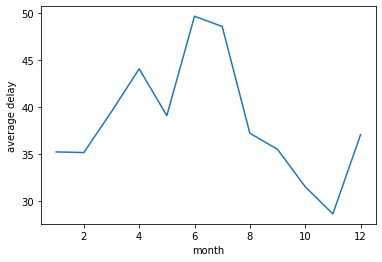

In [5]:
plt.plot(df0.groupby('month')['dep_delay'].mean())
plt.xlabel('month')
plt.ylabel('average delay')
plt.show()

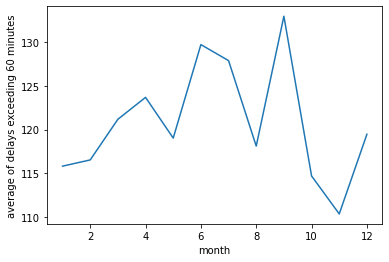

In [6]:
plt.plot(df60.groupby('month')['dep_delay'].mean())
plt.xlabel('month')
plt.ylabel('average of delays exceeding 60 minutes')
plt.show()

Видим, что в июне и июле задержки в среднем самые большие, а в сентябре самые длинные задержки длиной более 60 минут.

2. Рассмотрим среднюю задержку рейсов по часу вылета.

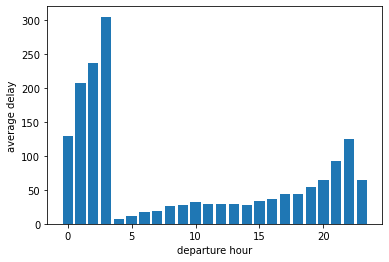

In [8]:
plt.bar(np.arange(24), np.array(df0.groupby('hour')['dep_delay'].mean()))
plt.xlabel('departure hour')
plt.ylabel('average delay')
plt.show()

Видим, что самые длинные задержки с 12 до 3 часов ночи.

3. Рассмотрим задержки в зависимости от авиакомпании.

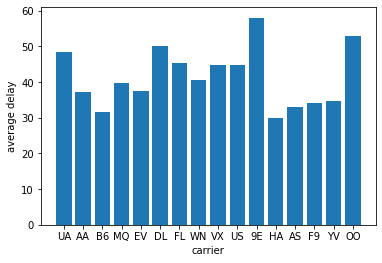

In [11]:
carriers = df0.dropna()['carrier'].unique()
plt.bar(np.arange(len(carriers)), df0.dropna().groupby('carrier')['dep_delay'].mean())
plt.xticks(np.arange(len(carriers)), carriers)
plt.xlabel('carrier')
plt.ylabel('average delay')
plt.show()

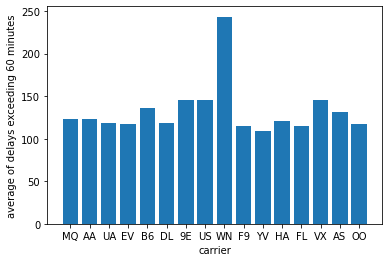

In [12]:
carriers = df60.dropna()['carrier'].unique()
plt.bar(np.arange(len(carriers)), df60.dropna().groupby('carrier')['dep_delay'].mean())
plt.xticks(np.arange(len(carriers)), carriers)
plt.xlabel('carrier')
plt.ylabel('average of delays exceeding 60 minutes')
plt.show()

Обнаруживаем, что самые длинные задержки в среднем у 9E, а самые длинные среди задержек более часа с большим отрывом у WN.

4. Теперь посмотрим на дни недели самых загруженных дней в году.

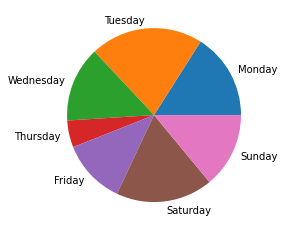

In [14]:
top_100_days = df0.dropna().groupby(['month', 'day'])['dep_delay'].mean().sort_values()[::-1].head(100)
dates_top_100 = np.array(top_100_days.axes).astype(int)[0].T
days_before_month = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])
week_days_top_100 = (days_before_month[dates_top_100[0] - 1] + dates_top_100[1] + 5) % 7
plt.pie(np.bincount(week_days_top_100), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()
#days with the greatest delays

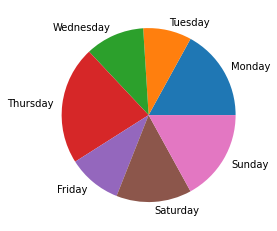

In [15]:
bottom_100_days = df0.dropna().groupby(['month', 'day'])['dep_delay'].mean().sort_values().head(100)
dates_bottom_100 = np.array(bottom_100_days.axes).astype(int)[0].T
week_days_bottom_100 = (days_before_month[dates_bottom_100[0] - 1] + dates_bottom_100[1] + 5) % 7
plt.pie(np.bincount(week_days_bottom_100), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()
#days with the lowest delays

На основе круговой диаграммы можно сделать вывод, что в четверг самые маленькие задержки (меньше всего дней с большими задержками и больше всего дней с маленькими). У вторника обратная ситуация (больше всего дней с большими задержками и меньше всего с маленькими).

5. Рассмотрим задержки по дням в году и праздникам.

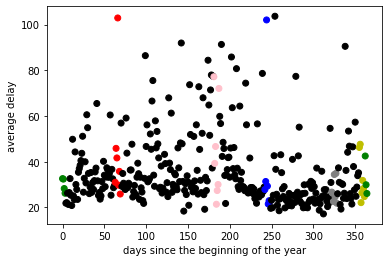

In [16]:
colors = np.full(365, 'black')
colors[181:188] = 'pink' #день независимости США
colors[:4] = 'g'
colors[362:] = 'g' #Новый год
colors[355:362] = 'y' #Рождество
colors[63:70] = 'r' #8 марта
colors[242:249] = 'b' #день труда
colors[322:329] = 'gray' #день благодарения
plt.scatter(np.arange(365), df0.dropna().groupby(['month', 'day'])['dep_delay'].mean(), c = colors)
plt.xlabel('days since the beginning of the year')
plt.ylabel('average delay')
plt.show()
#средние задержки по дням с подкрашенными праздниками и их окрестностями

In [17]:
df0.dropna().groupby(['month', 'day'])['dep_delay'].mean().sort_values()[::-1].head(10)

month  day 
9.0    12.0    103.651832
3.0    8.0     102.903522
9.0    2.0     102.035088
5.0    23.0     91.944056
7.0    10.0     91.318367
12.0   5.0      90.487603
4.0    10.0     86.412921
7.0    22.0     85.816116
6.0    24.0     84.405512
7.0    28.0     80.719715
Name: dep_delay, dtype: float64

Точечный график ещё раз подтверждает, что в среднем задержки больше летом, максимальные задержки могут быть связаны с праздниками (как 8 марта и 2 сентября - перед днём труда, два дня в окрестности дня независимости США), а могут быть и не связаны (12 сентября, 23 мая и 5 декабря задержки большие, обртано - в день благодарения, на Новый год и Рождество задержки не очень велики).

6. Рассмотрим скорость и направление ветра.

In [19]:
weather_url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
w_t = pd.read_csv(weather_url, sep=',').dropna()

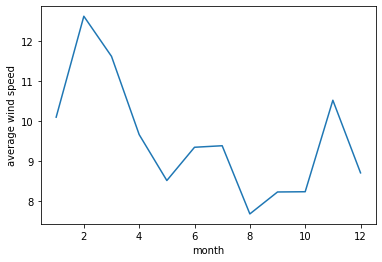

In [20]:
plt.plot(w_t.groupby(['month'])['wind_speed'].mean())
plt.xlabel('month')
plt.ylabel('average wind speed')
plt.show()

Видно, что самая большая скорость ветра в феврале, марте и ноябре.

7. Исследуем преобладающее направление ветра.

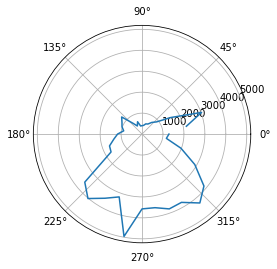

In [22]:
angles = np.sort(w_t['wind_dir'].unique())
values = w_t.groupby('wind_dir')['wind_speed'].sum()
plt.polar(np.sort(w_t['wind_dir'].unique())[1:] * np.pi / 180, w_t.groupby('wind_dir')['wind_speed'].sum()[1:])
plt.show()

По розе ветров понятно, что чаще всего в Нью-Йорке были юго-западный, южный и юго-восточный ветра.

8. Исследуем порывистость ветра.

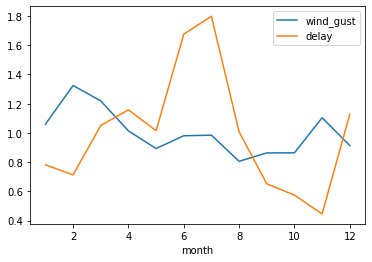

In [23]:
plt.plot(w_t.groupby(['month'])['wind_gust'].mean() / w_t['wind_gust'].mean(), label = 'wind_gust')
plt.plot(df60.dropna().groupby(['month'])['dep_delay'].sum() * 12 / df60.dropna()['dep_delay'].sum(), label = 'delay')
plt.xlabel('month')
plt.legend()
plt.show()
#взаимосвязь порывистости ветра и длительных задержек

In [24]:
np.corrcoef(w_t.groupby(['month', 'day'])['wind_gust'].mean(), df60.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

-0.07878772920812922

Корреляции не наблюдается, значит причина длинных задержек летом не в порывистости ветра.

9. Попробуем увидеть взаимосвязь задержек и осадков в аэропорту вылета.

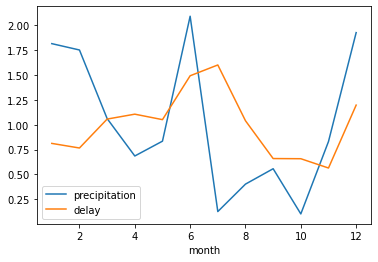

In [31]:
plt.plot(w_t.groupby(['month'])['precip'].mean() / w_t['precip'].mean(), label = 'precipitation')
plt.plot(df0.dropna().groupby(['month'])['dep_delay'].sum() * 12 / df0.dropna()['dep_delay'].sum(), label = 'delay')
plt.xlabel('month')
plt.legend()
plt.show()
#взаимосвязь осадков и задержек

In [27]:
np.corrcoef(w_t.groupby(['month', 'day'])['precip'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

0.2128358017548486

Наблюдается небольшая корреляция между осадками и общей длительностью задержек. Значит, при более сильных осадках самолёты больше задерживаются.

10. Изучим зависимость длительности задержек и точки росы.

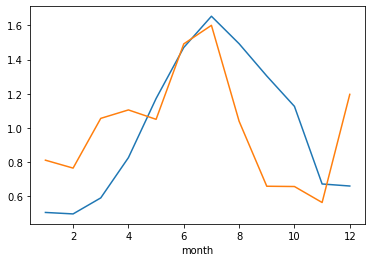

In [28]:
plt.plot(w_t.groupby(['month'])['dewp'].mean() / w_t['dewp'].mean(), label = 'visibility')
plt.plot(df0.dropna().groupby(['month'])['dep_delay'].sum() * 12 / df0.dropna()['dep_delay'].sum(), label = 'delay')
plt.xlabel('month')
plt.show()
#взаимосвязь точки росы и задержек

In [29]:
np.corrcoef(w_t.groupby(['month', 'day'])['dewp'].mean() - w_t['dewp'].mean(), df0.dropna().groupby(['month', 'day'])['dep_delay'].sum()[:-1])[0,1]

0.3411118637242932

Заметим, что в этот раз корреляция уже заметная, что видно и по графику, и по коэффициенту корреляции.

Спасибо за внимание!